In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('student-mat.csv',sep=';')

In [10]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Hipoteza 1
### Studenci z rozwiedzionych rodzin uczą się gorzej

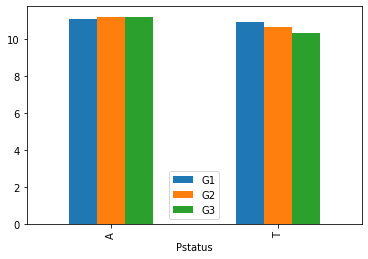

In [22]:
# Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
cols = ['G1','G2','G3','Pstatus']
hip1 = df.loc[:,cols]
hip1.groupby('Pstatus')[['G1','G2','G3']].mean().plot(kind='bar')

Paradoksalnie widzimy ze dane mówią coś dokładnie na odwrót, niż to co wyformułowałem w hipotezie, więc należy ją odrzucić.

# Hipoteza 2

### Studenci uczący się więcej mają lepsze oceny

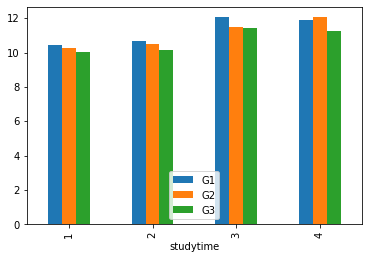

In [24]:
#studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
cols = ['G1','G2','G3','studytime']
hip2 = df.loc[:,cols]
hip2.groupby('studytime')[['G1','G2','G3']].mean().plot(kind='bar')

W tym wypadku zaskoczeń nie było i moja hipoteza okazała się byc prawdziwa, aczkolwiek można odnieść wrażenie że najbardziej efektywna może być nauka od 5 do 10 godzin, gdyż w tej grupie wyniki są prawie tak samo dobre jak w grupie która uczy się powyżej 10 godzin.

# Hipoteza 3

### Uczniowie w związkach mają więcej absencji szkolnych

no          AxesSubplot(0.1,0.15;0.363636x0.75)
yes    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

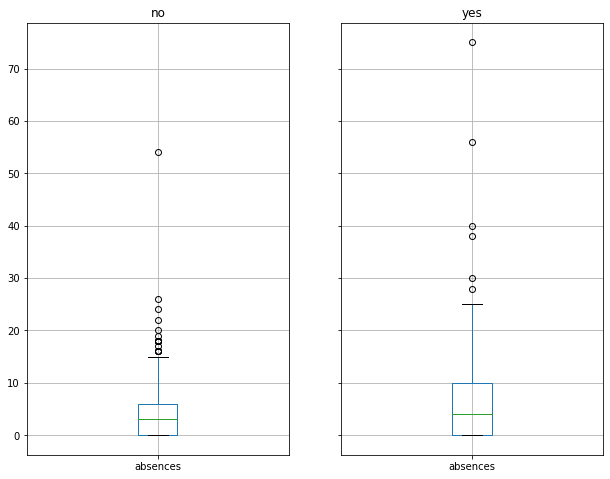

In [33]:
#romantic - with a romantic relationship (binary: yes or no)
#absences - number of school absences (numeric: from 0 to 93)

cols = ['romantic','absences']
hip3 = df.loc[:,cols]
hip3.groupby('romantic').boxplot(figsize=(10,8))

In [34]:
hip3.groupby('romantic').mean()

,absences
romantic,
no,4.840304
yes,7.439394


Rozkład nieobecności w tych dwóch grupach jest dość interesujący i jednocześnie potwierdza moją hipotezę. Wąsy na boxplocie uczniów w związkach są znacznie dłuzsze, a także sama średnia jest mocno przesunięta w góre.

# Hipoteza 4

### Chłopcy częściej nie zdają z klasy do klasy

In [53]:
#sex - student's sex (binary: "F" - female or "M" - male)
#failures - number of past class failures (numeric: n if 1<=n<3, else 4)
cols = ['sex','failures']
hip4 = df.loc[:,cols]
hip4['failures'].value_counts()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

In [54]:
hip4['failures'] = hip4['failures'].map({0:0,1:1,2:1,3:1})

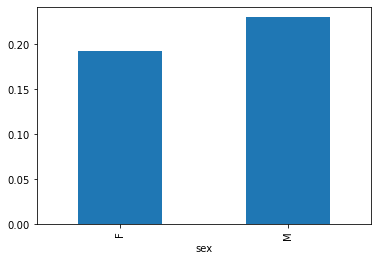

In [51]:
hip4.groupby('sex')['failures'].mean().plot(kind='bar')

Widzimy ze znacznie większy procent chłopców musiał powtarzać jakąś klasę w stosunku do dziewczyn, więc moja hipoteza nie mija się z prawdą.

# Hipoteza 5

### Uczniowie pijący więcej alkoholu są mniej zdrowi

In [64]:
#Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
#Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
#health - current health status (numeric: from 1 - very bad to 5 - very good)
cols = ['Dalc','Walc','health']
hip5 = df.loc[:,cols]

In [65]:
hip5['Total_alc'] = hip5['Dalc'] + hip5['Walc']
hip5.drop(['Dalc','Walc'],axis=1,inplace=True)

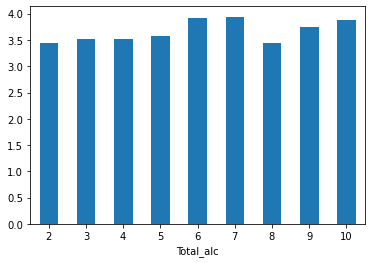

In [81]:
hip5.groupby('Total_alc')['health'].mean().plot(kind='bar',rot='360')

Widzimy że paradoksalnie najzdrowiej czują się uczniowie spożywający umiarkowane ilości alkoholu, więc raczej mamy podstawy do odrzucenia hipotezy.